# USED CAR PRICE PREDICTION AND MARKET ANALYSIS
**Objectives:**

1)The goal of this project is to analyze the used car market and build a predictive model for car prices.

2)To Find Releationships Among Different Features and To Find Patterens

3)To Analyze Used Car Dataset To Find Valuable Insights For Business


# Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
from tqdm import tqdm
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Data Inspection & Cleaning

In [8]:
df=pd.read_csv('cars.csv')
df.head()

,make,model,year,mileage,fuel_type,transmission,engine_size,horsepower,price
0,Kia,Model_17,2018,5925,Petrol,Manual,3.1,236,20111.75
1,BMW,Model_40,2020,56595,Petrol,Manual,2.2,246,14670.82
2,Nissan,Model_12,2002,135249,Diesel,Automatic,4.7,329,6821.21
3,Mercedes,Model_43,2010,21321,Petrol,Automatic,4.1,273,16608.49
4,Kia,Model_40,2006,146841,Petrol,Automatic,3.3,354,4013.05


In [9]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          10000 non-null  object 
 1   model         10000 non-null  object 
 2   year          10000 non-null  int64  
 3   mileage       10000 non-null  int64  
 4   fuel_type     10000 non-null  object 
 5   transmission  10000 non-null  object 
 6   engine_size   10000 non-null  float64
 7   horsepower    10000 non-null  int64  
 8   price         10000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 703.3+ KB


In [10]:
df.describe(include='all')

,make,model,year,mileage,fuel_type,transmission,engine_size,horsepower,price
count,10000,10000,10000.000000,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10,50,NaN,NaN,4,2,NaN,NaN,NaN
top,Toyota,Model_45,NaN,NaN,Petrol,Manual,NaN,NaN,NaN
freq,1053,229,NaN,NaN,4951,6077,NaN,NaN,NaN
mean,NaN,NaN,2011.187600,127160.57510,NaN,NaN,3.011520,229.407400,9724.386400
std,NaN,NaN,6.599694,70875.96021,NaN,NaN,1.153325,97.766778,5137.389264
min,NaN,NaN,2000.000000,5016.00000,NaN,NaN,1.000000,60.000000,2000.000000
25%,NaN,NaN,2006.000000,65877.00000,NaN,NaN,2.000000,145.000000,5624.212500
50%,NaN,NaN,2011.000000,127280.00000,NaN,NaN,3.000000,230.000000,9512.010000
75%,NaN,NaN,2017.000000,188675.25000,NaN,NaN,4.000000,312.000000,13448.807500


In [11]:
df.isna().sum()

make            0
model           0
year            0
mileage         0
fuel_type       0
transmission    0
engine_size     0
horsepower      0
price           0
dtype: int64

In [12]:
df[df.duplicated()]

,make,model,year,mileage,fuel_type,transmission,engine_size,horsepower,price


In [13]:
df['Car_Age']=2023-df['year']
df.head()

,make,model,year,mileage,fuel_type,transmission,engine_size,horsepower,price,Car_Age
0,Kia,Model_17,2018,5925,Petrol,Manual,3.1,236,20111.75,5
1,BMW,Model_40,2020,56595,Petrol,Manual,2.2,246,14670.82,3
2,Nissan,Model_12,2002,135249,Diesel,Automatic,4.7,329,6821.21,21
3,Mercedes,Model_43,2010,21321,Petrol,Automatic,4.1,273,16608.49,13
4,Kia,Model_40,2006,146841,Petrol,Automatic,3.3,354,4013.05,17


In [14]:
bins=np.linspace(min(df['price']),max(df['price']),4)
labels=['Low Price','Medium Price','High Price']
df['Price_Category']=pd.cut(df['price'],bins,labels=labels,include_lowest=True)
df.head()

,make,model,year,mileage,fuel_type,transmission,engine_size,horsepower,price,Car_Age,Price_Category
0,Kia,Model_17,2018,5925,Petrol,Manual,3.1,236,20111.75,5,High Price
1,BMW,Model_40,2020,56595,Petrol,Manual,2.2,246,14670.82,3,Medium Price
2,Nissan,Model_12,2002,135249,Diesel,Automatic,4.7,329,6821.21,21,Low Price
3,Mercedes,Model_43,2010,21321,Petrol,Automatic,4.1,273,16608.49,13,Medium Price
4,Kia,Model_40,2006,146841,Petrol,Automatic,3.3,354,4013.05,17,Low Price


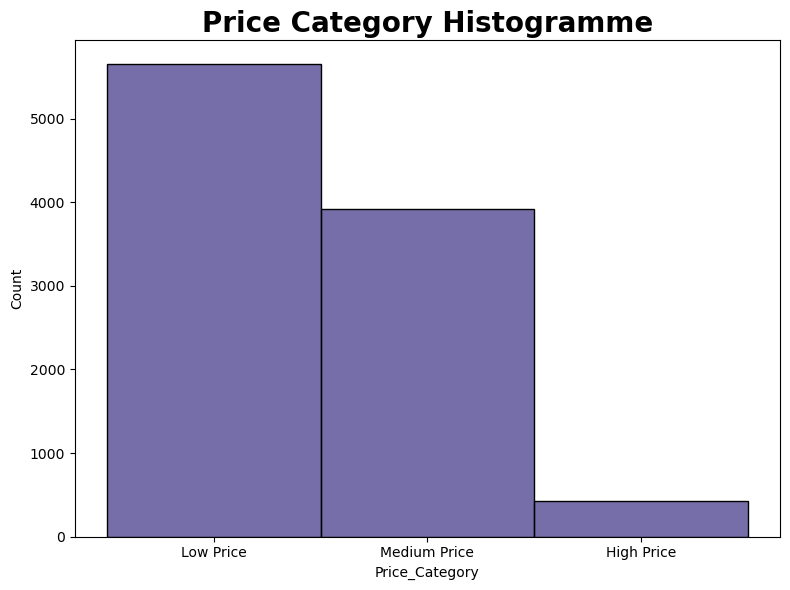

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Price_Category',color='darkslateblue')
plt.title('Price Category Histogramme',fontweight='bold',fontsize=20)
plt.tight_layout()
plt.style.use('ggplot')

# Exploratory Data Analysis

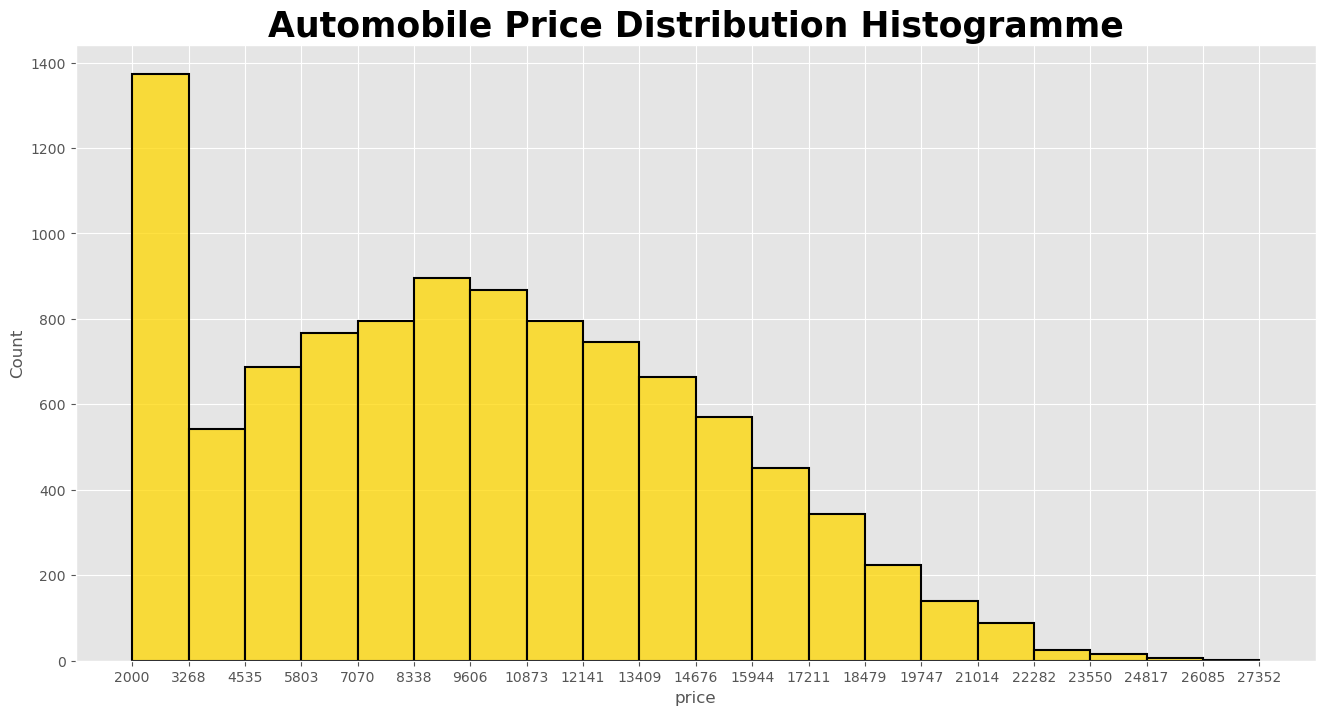

In [16]:
count,bine=np.histogram(df['price'],20)
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
sns.histplot(data=df,x='price',edgecolor='black',color='gold',lw=1.5,bins=20)
plt.title('Automobile Price Distribution Histogramme',fontweight='bold',fontsize=25)
plt.xticks(bine)
print()

Text(0.5, 1.0, 'Releationship Between Year and Price')

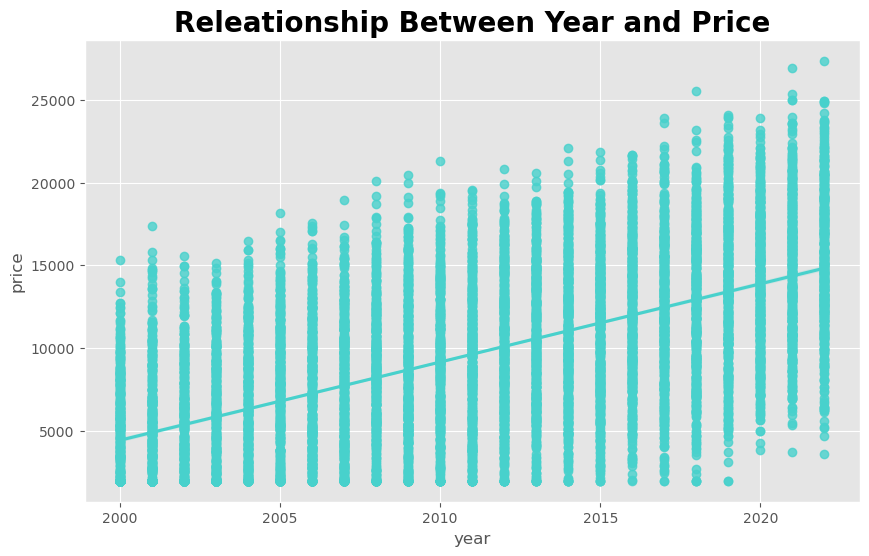

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='year',y='price',color='mediumturquoise')
plt.title('Releationship Between Year and Price',fontweight='bold',fontsize=20)

Text(0.5, 1.0, 'Releationship Between Milleage and Price')

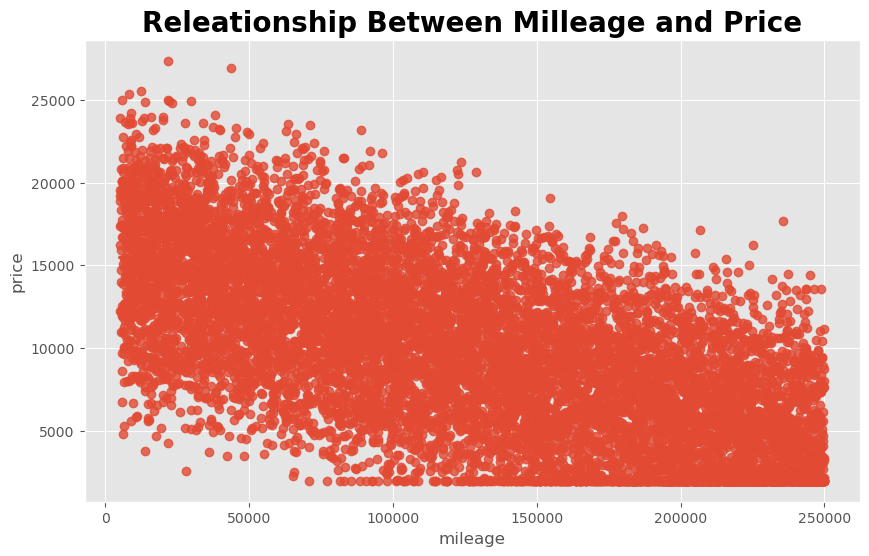

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='mileage',y='price')
plt.title('Releationship Between Milleage and Price',fontweight='bold',fontsize=20)

Text(0.5, 1.0, 'Releationship Between Horsepower and Price')

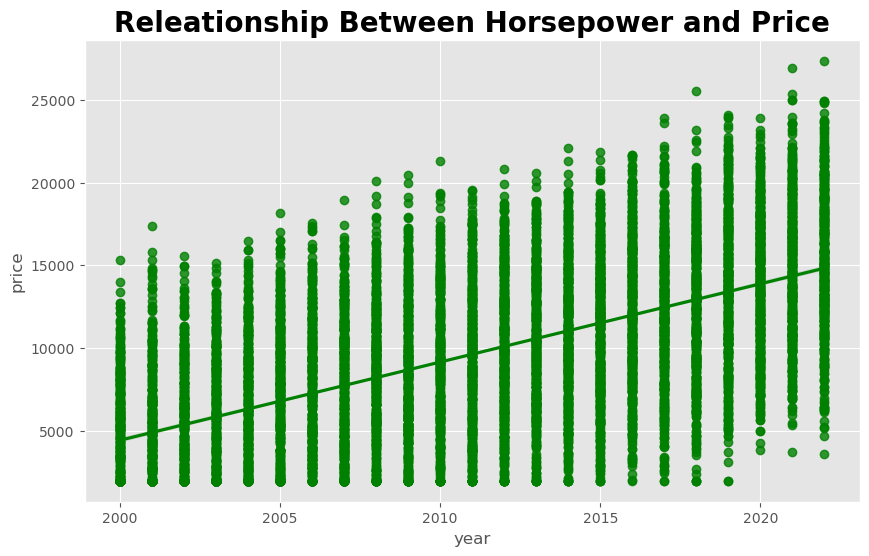

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='year',y='price',color='g')
plt.title('Releationship Between Horsepower and Price',fontweight='bold',fontsize=20)

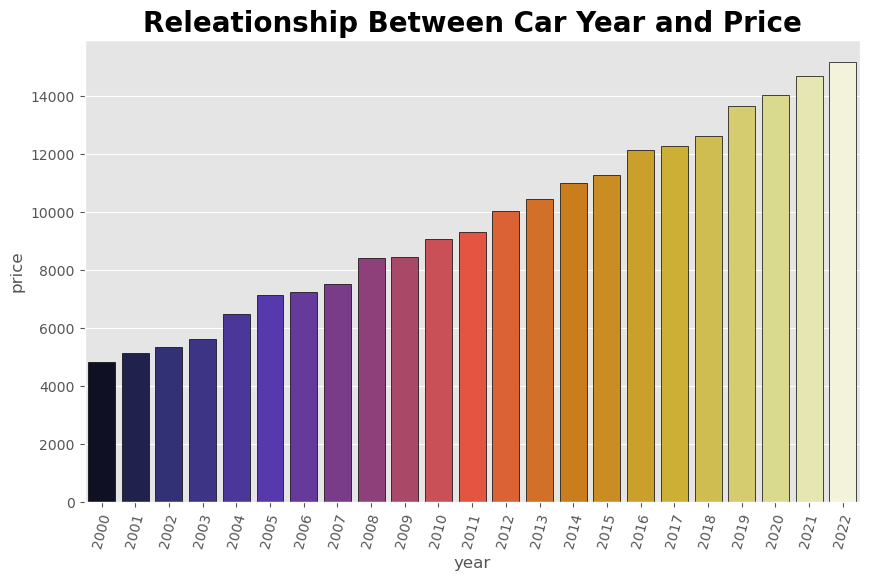

In [20]:
plt.figure(figsize=(10,6))
plt.title('Releationship Between Car Year and Price',fontweight='bold',fontsize=20)
sns.barplot(data=df,x='year',y='price',errorbar=None,edgecolor='black',palette='CMRmap')
plt.xticks(rotation=75)
print()

<Axes: title={'center': 'Releationship Between Fuel_Type and Price'}, xlabel='fuel_type', ylabel='price'>

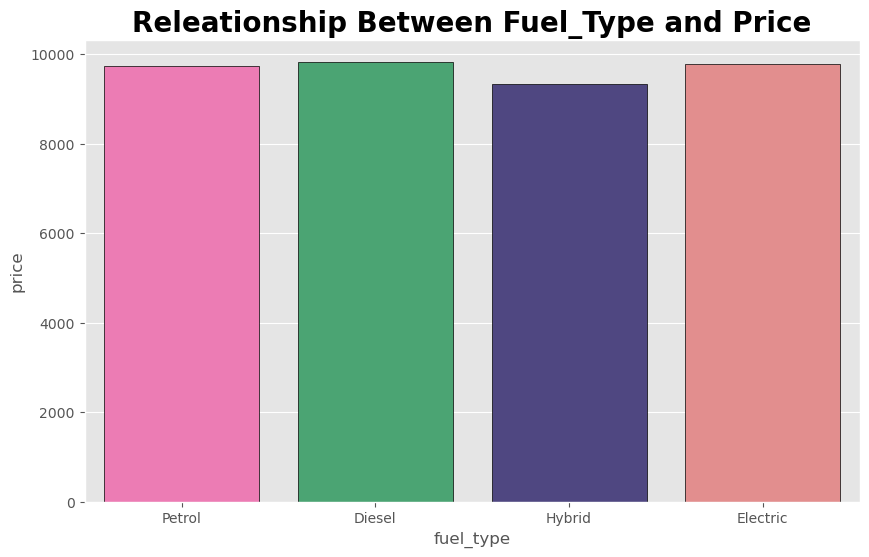

In [21]:
plt.figure(figsize=(10,6))
plt.title('Releationship Between Fuel_Type and Price',fontweight='bold',fontsize=20)
sns.barplot(data=df,x='fuel_type',y='price',errorbar=None,edgecolor='black',palette=['Hotpink','Mediumseagreen','Darkslateblue','lightcoral'])

In [22]:
num_df=df.select_dtypes(include=[int,float])

Text(0.5, 1.0, 'Correleation Heatmap Of Numerical Columns')

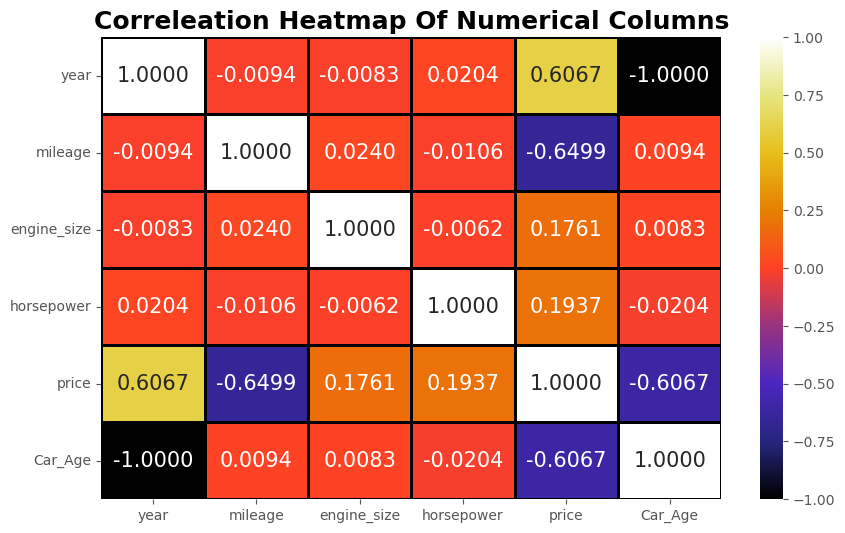

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(),annot=True,fmt='.4f',cmap='CMRmap',lw=2,linecolor='black',annot_kws={'size':15})
plt.title('Correleation Heatmap Of Numerical Columns',fontweight='bold',fontsize=18)

In [24]:
lis=['year', 'mileage', 'engine_size', 'horsepower', 'price', 'Car_Age']
for el in lis:
    pearson_coeff,p_val=stats.pearsonr(df[el],df['price'])
    print(f"Pearson Correleation Between {el} and Price:")
    print()
    print(f"Pearson Coefficient of Correleation = {pearson_coeff}\nP-Value of This Releation = {p_val}")
    print()

Pearson Correleation Between year and Price:

Pearson Coefficient of Correleation = 0.6066918436084225
P-Value of This Releation = 0.0

Pearson Correleation Between mileage and Price:

Pearson Coefficient of Correleation = -0.6499485677155494
P-Value of This Releation = 0.0

Pearson Correleation Between engine_size and Price:

Pearson Coefficient of Correleation = 0.1760997081104005
P-Value of This Releation = 1.8303879691325463e-70

Pearson Correleation Between horsepower and Price:

Pearson Coefficient of Correleation = 0.19372430703786353
P-Value of This Releation = 3.700975356048801e-85

Pearson Correleation Between price and Price:

Pearson Coefficient of Correleation = 1.0
P-Value of This Releation = 0.0

Pearson Correleation Between Car_Age and Price:

Pearson Coefficient of Correleation = -0.6066918436084225
P-Value of This Releation = 0.0



In [25]:
group1=df.groupby(['make','fuel_type'],as_index=False)['price'].mean()
group1.sort_values(by='price',ascending=False).head()

,make,fuel_type,price
25,Mercedes,Electric,10637.741000
13,Honda,Electric,10449.706517
36,Volkswagen,Diesel,10360.161893
1,BMW,Electric,10031.674130
29,Nissan,Electric,10028.392574


In [26]:
pivot1=group1.pivot_table(index='make',columns='fuel_type',values='price')
pivot1.head()

fuel_type,Diesel,Electric,Hybrid,Petrol
make,,,,
BMW,9954.656237,10031.674130,8864.071759,9580.761280
Chevrolet,9448.452857,9307.720769,8730.572157,9275.955127
Ford,9760.684583,9432.777327,9739.687717,9837.183992
Honda,9560.716721,10449.706517,9639.552705,9490.935386
Hyundai,10003.131291,9704.168317,9131.769189,9756.185306


Text(0, 0.5, 'Price')

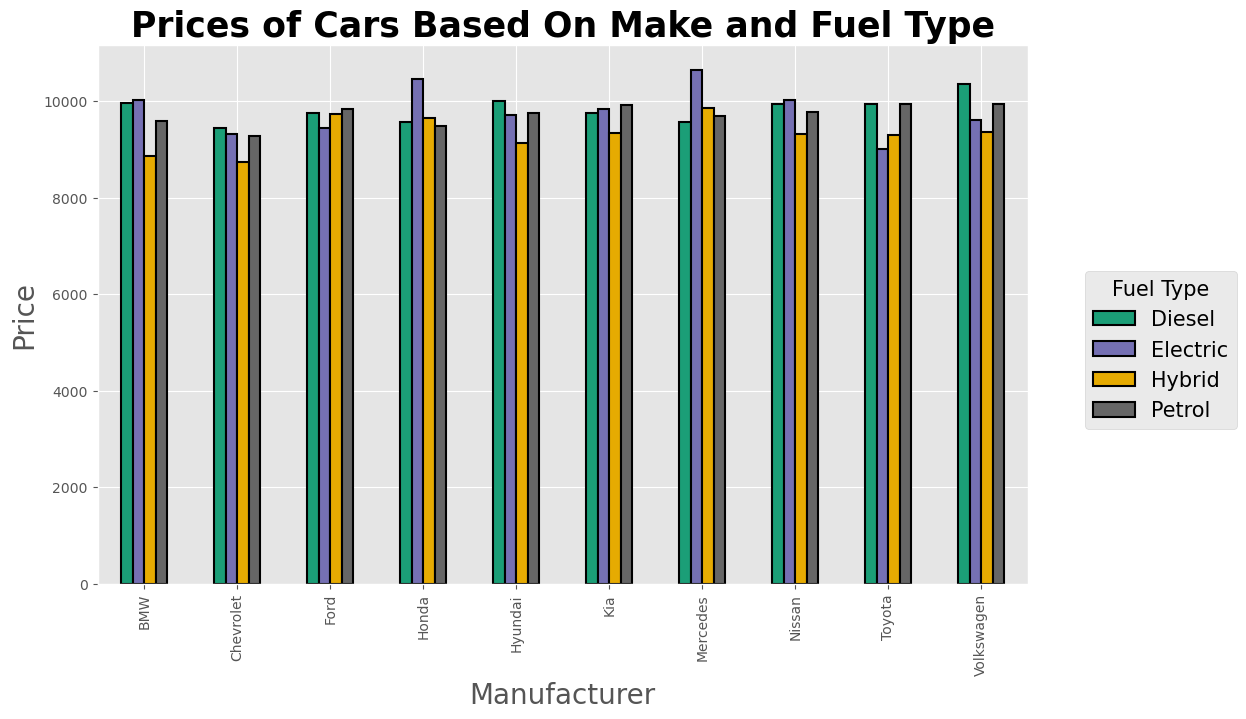

In [27]:
pivot1.plot(kind='bar',edgecolor='black',lw=1.5,cmap='Dark2',figsize=(12,7))
plt.title('Prices of Cars Based On Make and Fuel Type',fontweight='bold',fontsize=25)
plt.legend(bbox_to_anchor=(1.05,0.6),fontsize=15,title='Fuel Type',title_fontsize=15)
plt.xlabel('Manufacturer',fontsize=20)
plt.ylabel('Price',fontsize=20)

In [28]:
group2=df.groupby(['mileage','transmission','engine_size','horsepower'],as_index=False)['price'].mean()
group2.head()

,mileage,transmission,engine_size,horsepower,price
0,5016,Manual,4.1,370,19183.78
1,5056,Manual,3.5,85,12216.59
2,5059,Manual,2.6,356,18909.06
3,5093,Manual,2.3,285,19531.56
4,5146,Manual,1.6,182,17366.17


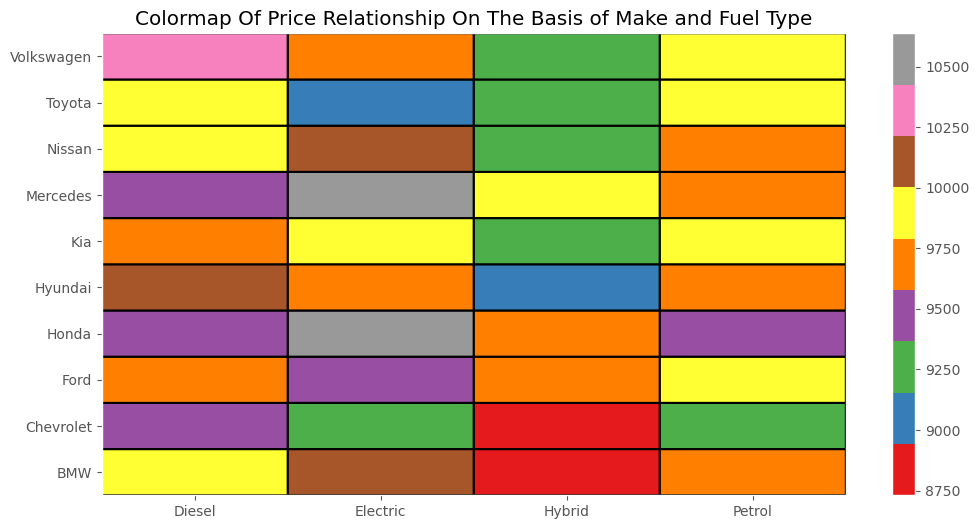

In [29]:
pivot2=group2.pivot_table(index='horsepower',columns=['mileage','engine_size','transmission'],values='price')
fig,ax=plt.subplots(figsize=(12,6))
im=ax.pcolor(pivot1,cmap='Set1',edgecolor='black',lw=1.5)

row_label=pivot1.columns
col_label=pivot1.index

ax.set_xticks(np.arange(pivot1.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(pivot1.shape[0])+0.5,minor=False)

ax.set_xticklabels(row_label)
ax.set_yticklabels(col_label)

fig.colorbar(im)
plt.title('Colormap Of Price Relationship On The Basis of Make and Fuel Type')
plt.show()

# Business Interpretations

In [30]:
print('1) Electric and Disel cars has the highst prices and between these two Electric Car cost Higher.') 
print('2) There is a negative correleation between Car Year and Price which shows that older model cars has a low price as compared to new model cars and 2022  model car has the highest price. ')
print('3) From the histogramme the price Distribution is shown which shows that most of the cars have a low price meaning most of the cars sells less.')

1) Electric and Disel cars has the highst prices and between these two Electric Car cost Higher.
2) There is a negative correleation between Car Year and Price which shows that older model cars has a low price as compared to new model cars and 2022  model car has the highest price. 
3) From the histogramme the price Distribution is shown which shows that most of the cars have a low price meaning most of the cars sells less.


# Model Development

In [31]:
df.drop(['model','Price_Category'],axis=1,inplace=True)

In [32]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [33]:
X=df_encoded.drop('price',axis=1)
Y=df['price']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
Input=[('Standard',StandardScaler()),('Polynomial',PolynomialFeatures(degree=2,include_bias=False)),('Model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)

Pipeline(steps=[('Standard', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('Model', LinearRegression())])

In [34]:
pred=pipe.predict(x_test)

print(f'r2 testing Score of the model = {pipe.score(x_test,y_test)}')
print()
print(f'MAE of the model = {mean_absolute_error(y_test,pred)}')
print()
print(f'r2 training Score of the model = {pipe.score(x_test,y_test)}')
print()
print(f'RMSE of the model = {root_mean_squared_error(y_test,pred)}')

r2 testing Score of the model = 0.865063640297782

MAE of the model = 1497.939525

r2 training Score of the model = 0.865063640297782

RMSE of the model = 1883.8561505605599


In [35]:
cross=cross_val_score(pipe,X,Y,cv=4)
cross.mean()

0.8565266280893429

In [36]:
CRP=cross_val_predict(pipe,X,Y,cv=4)
r2_score(Y,CRP)

0.8566224700513096

In [37]:
Input=[('Standard',StandardScaler()),('Polynomial',PolynomialFeatures(degree=2,include_bias=False)),('Model',Ridge())]
pipe1=Pipeline(Input)

param={'Model__alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
grid=GridSearchCV(pipe1,param,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Standard', StandardScaler()),
                                       ('Polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('Model', Ridge())]),
             param_grid={'Model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                          1000]})

In [38]:
best=grid.best_estimator_
grid_pred=best.predict(x_test)
best.score(x_test,y_test)

0.8649946947858443

In [39]:
r2_score(y_test,grid_pred)

0.8649946947858443

In [40]:
print(f'r2 testing Score of the model = {best.score(x_test,y_test)}')
print()
print(f'MAE of the model = {mean_absolute_error(y_test,grid_pred)}')
print()
print(f'r2 training Score of the model = {best.score(x_test,y_test)}')
print()
print(f'RMSE of the model = {root_mean_squared_error(y_test,grid_pred)}')

r2 testing Score of the model = 0.8649946947858443

MAE of the model = 1498.1580128258122

r2 training Score of the model = 0.8649946947858443

RMSE of the model = 1884.3373657063894


In [41]:
r2_ridge = r2_score(y_test, grid_pred)
mae_ridge = mean_absolute_error(y_test, grid_pred)
rmse_ridge = root_mean_squared_error(y_test, grid_pred)
r2_lr = r2_score(y_test, pred)
mae_lr = mean_absolute_error(y_test, pred)
rmse_lr = root_mean_squared_error(y_test, pred)

In [42]:
com=pd.DataFrame({'Model':['Linear Model','Ridge Model'],
                  'r2 Score':[r2_lr,r2_ridge],
                  'MAE':[mae_lr,mae_ridge],
                  'RMSE':[rmse_lr,rmse_ridge]})
com

,Model,r2 Score,MAE,RMSE
0,Linear Model,0.865064,1497.939525,1883.856151
1,Ridge Model,0.864995,1498.158013,1884.337366


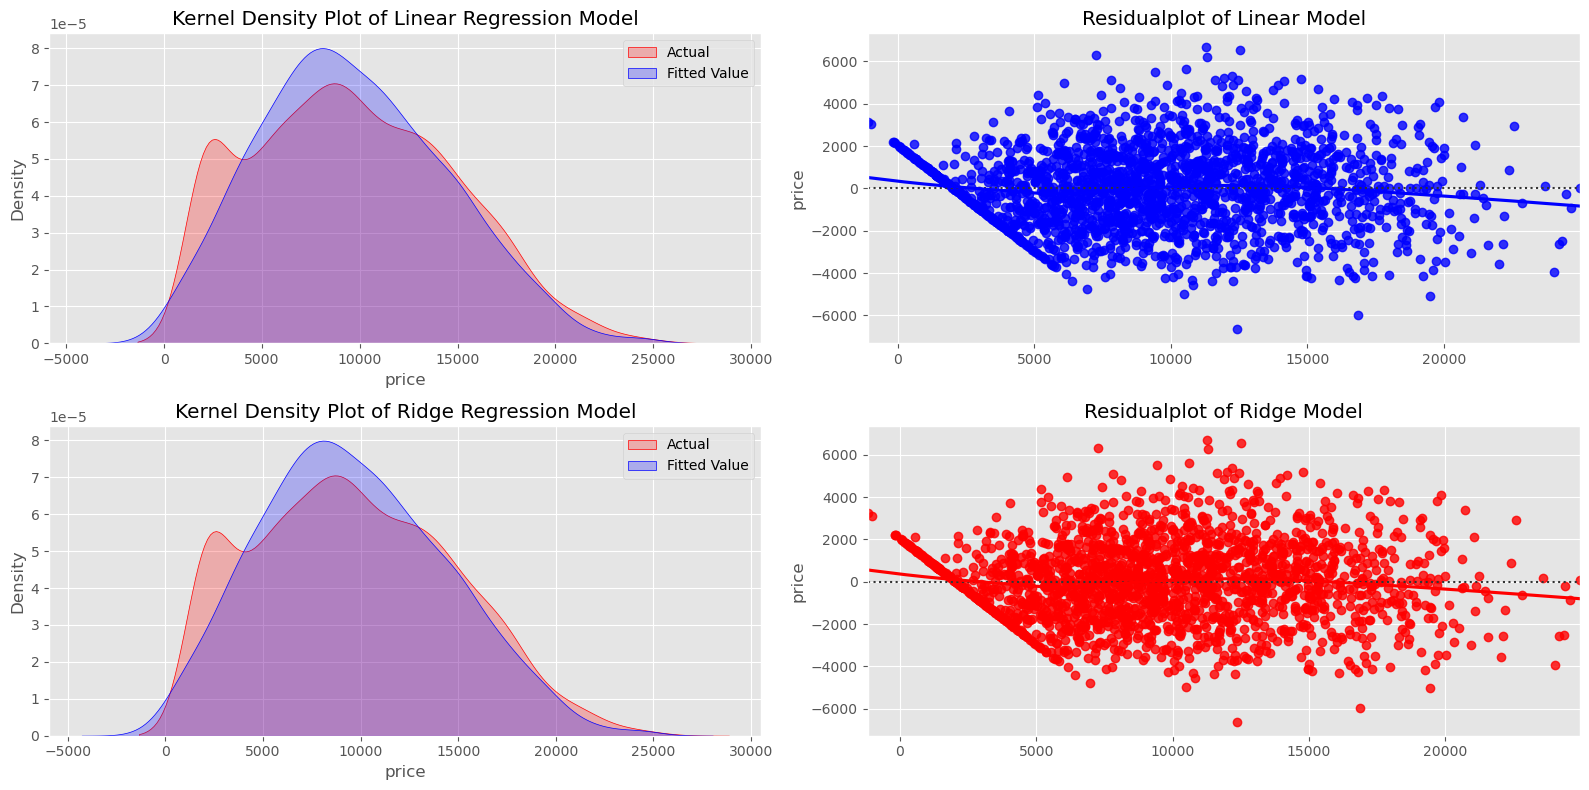

In [43]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(x=y_test,fill=True,color='r',label='Actual')
sns.kdeplot(x=pred,fill=True,color='b',label='Fitted Value')
plt.title('Kernel Density Plot of Linear Regression Model')
plt.legend()

plt.subplot(2,2,3)
sns.kdeplot(x=y_test,fill=True,color='r',label='Actual')
sns.kdeplot(x=grid_pred,fill=True,color='b',label='Fitted Value')
plt.title('Kernel Density Plot of Ridge Regression Model')
plt.legend()


plt.subplot(2,2,2)
sns.residplot(x=pred,y=y_test,lowess=True,color='b')
plt.title('Residualplot of Linear Model')

plt.subplot(2,2,4)
sns.residplot(x=grid_pred,y=y_test,lowess=True,color='r')
plt.title('Residualplot of Ridge Model')
plt.tight_layout()

In [44]:
X

,year,mileage,engine_size,horsepower,Car_Age,make_Chevrolet,make_Ford,make_Honda,make_Hyundai,make_Kia,make_Mercedes,make_Nissan,make_Toyota,make_Volkswagen,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Petrol,transmission_Manual
0,2018,5925,3.1,236,5,False,False,False,False,True,False,False,False,False,False,False,True,True
1,2020,56595,2.2,246,3,False,False,False,False,False,False,False,False,False,False,False,True,True
2,2002,135249,4.7,329,21,False,False,False,False,False,False,True,False,False,False,False,False,False
3,2010,21321,4.1,273,13,False,False,False,False,False,True,False,False,False,False,False,True,False
4,2006,146841,3.3,354,17,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2013,70196,4.6,204,10,False,False,False,False,True,False,False,False,False,False,False,True,True
9996,2012,157515,3.4,84,11,False,False,False,False,False,False,False,False,True,False,False,True,True
9997,2011,189622,4.0,170,12,False,True,False,False,False,False,False,False,False,False,False,False,False
9998,2000,212051,3.3,114,23,False,False,False,False,False,False,False,False,True,False,False,True,False


In [45]:
Input=[('Standard',StandardScaler()),('Polynomial',PolynomialFeatures(degree=2,include_bias=False)),('Model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,Y)
prediction=pipe.predict([[2018,50000,5.2,545,5,False,True,False,False,False,False,False,False,False,True,False,False,False]])
prediction

array([24279.5])

# Conclusion 
Both Models are good enough to be used but linear model is more best choice because of its r2_score,MAE,RMSE

Linear model can be used to make price predictions that can help the business very well 
